COUN_NAME         object
MPO               object
TAZ                int32
L_D_RE_Ar        float64
M_D_RE_SF_Ar     float64
M_D_RE_MF_Ar     float64
H_D_RE_Ar        float64
MU_Ar            float64
COM_Ar           float64
INS_Ar           float64
OF_Ar            float64
IND_Ar           float64
Other_Ar         float64
AG_Ar            float64
FO_Ar            float64
PA_Ar            float64
LDHH             float64
MDSFHH           float64
MDMFHH           float64
HDHH             float64
MUHH             float64
TSFHH            float64
TMFHH            float64
COM_EMP          float64
INS_EMP          float64
OF_EMP           float64
IND_EMP          float64
Other_EMP        float64
AG_EMP           float64
MU_EMP           float64
JUR               object
HH                 int64
TOT_EMP            int64
res_total_Ar     float64
Parcel_ACR_Ar    float64
TAZ_ACRES_Ar     float64
T_EMP_AR_Ar      float64
TOT_POP            int64
dtype: object


C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\rsingh\AppData\Local\Temp\ipykernel_28596\3392332707.py:282: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Scn_Output.to_file(driver = 'ESRI Shapefile', filename =r'Scn_Output.shp', crs = "EPSG:4326" )
C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attr

<AxesSubplot:>

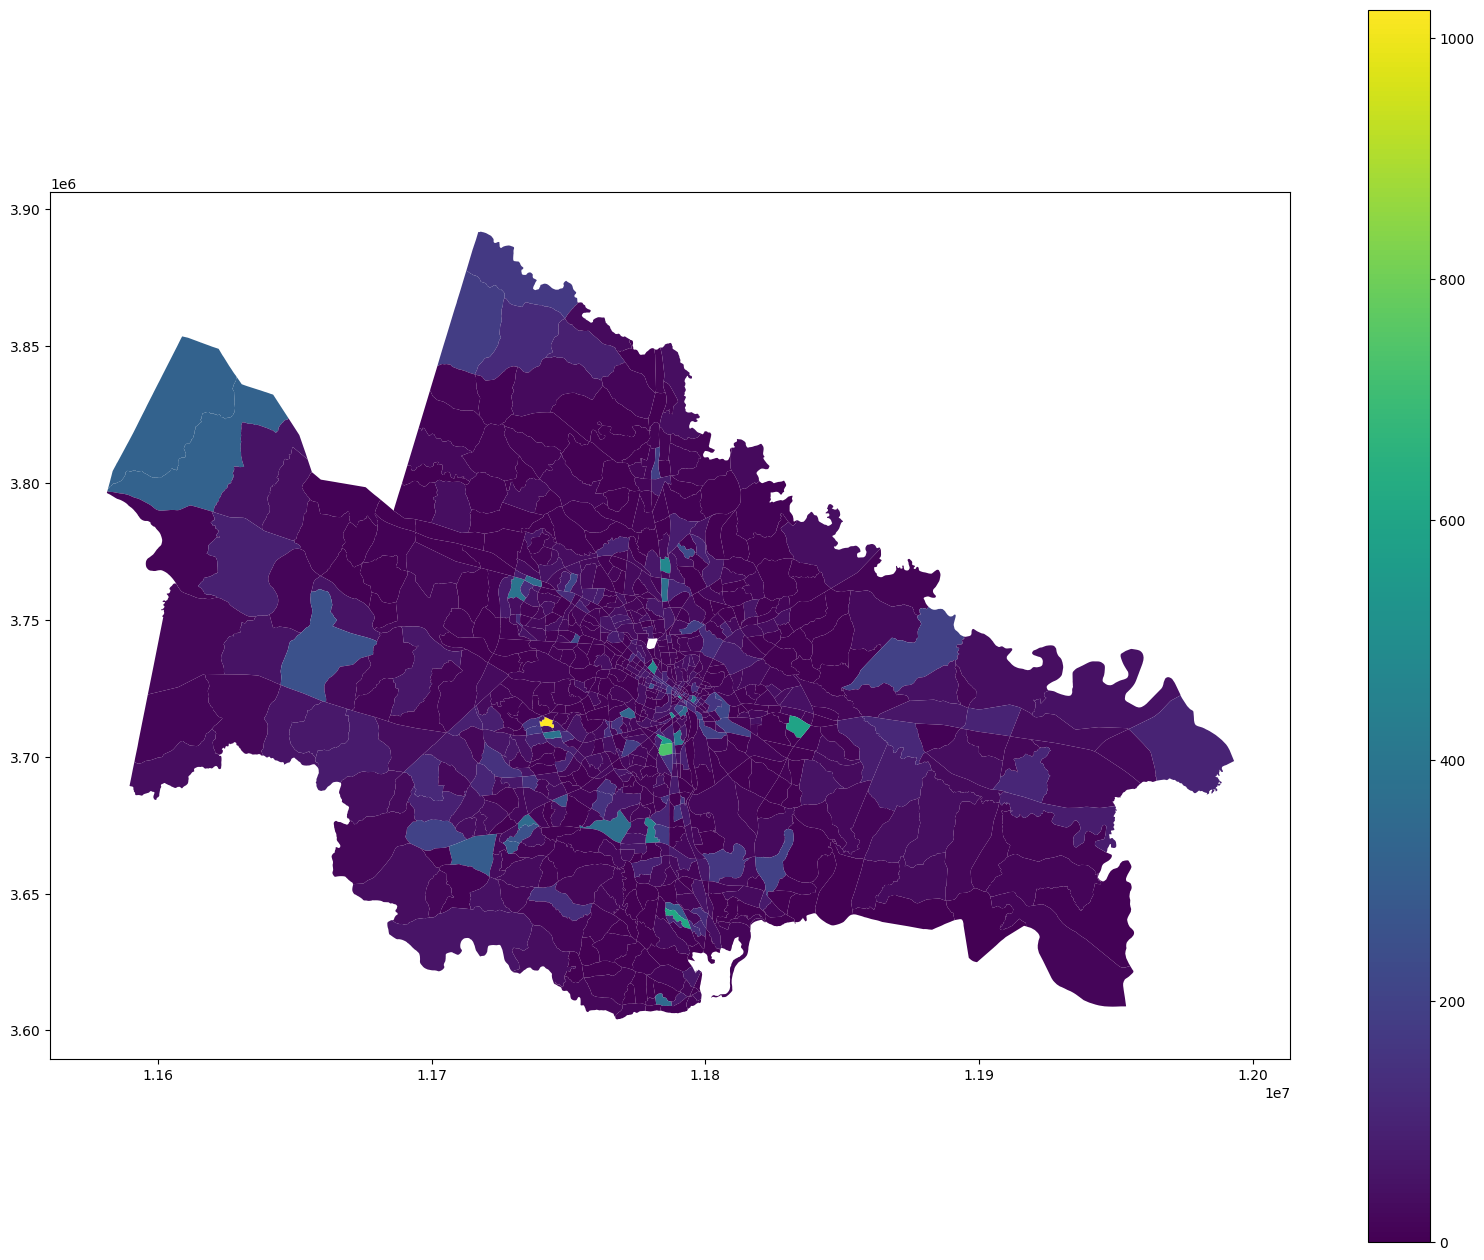

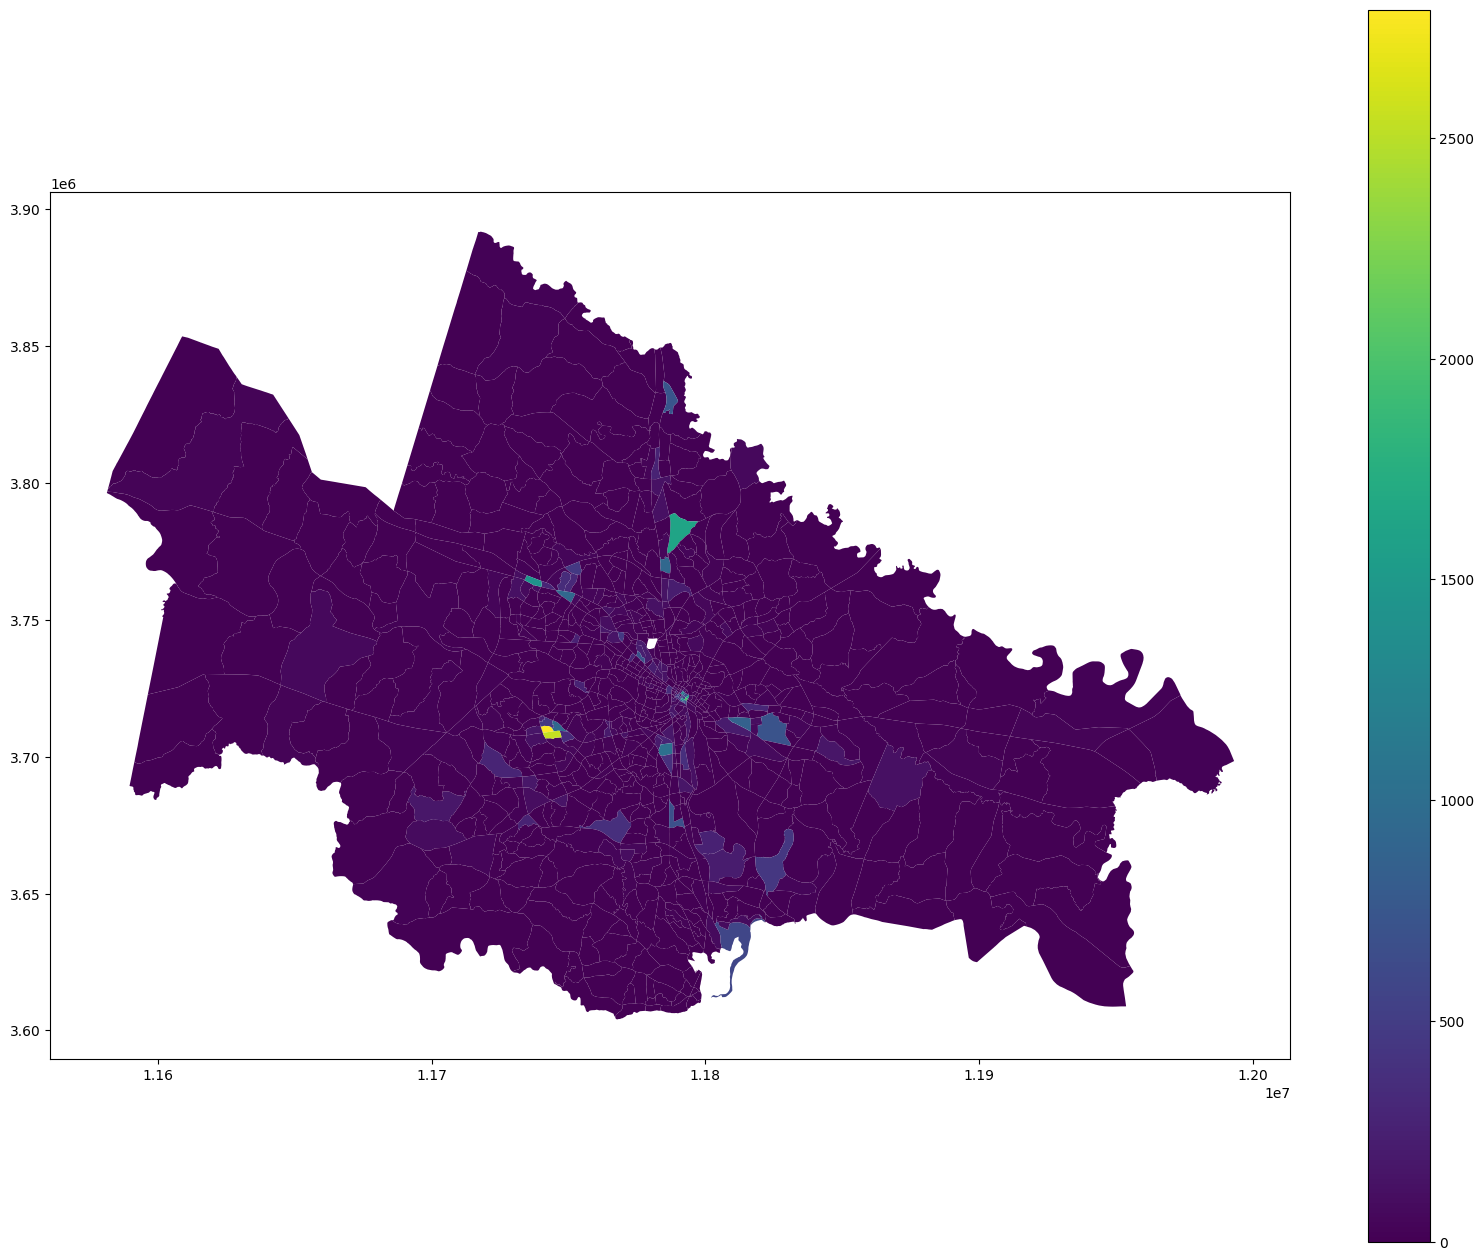

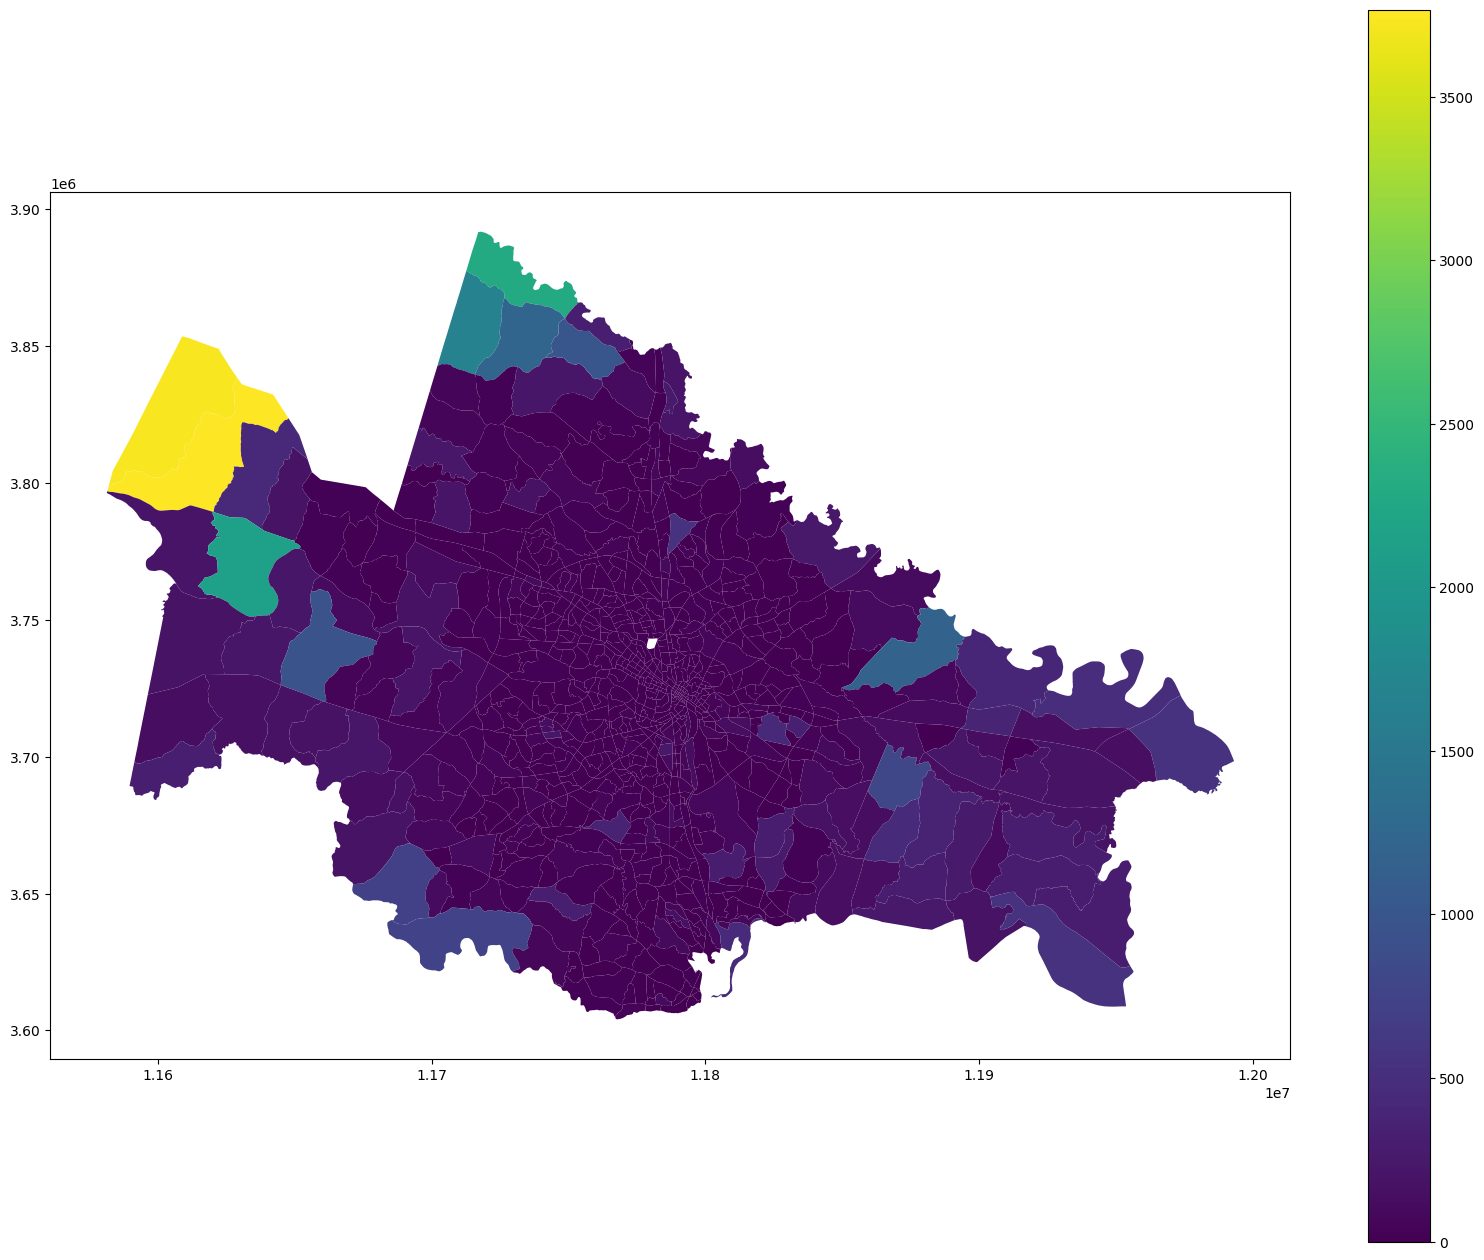

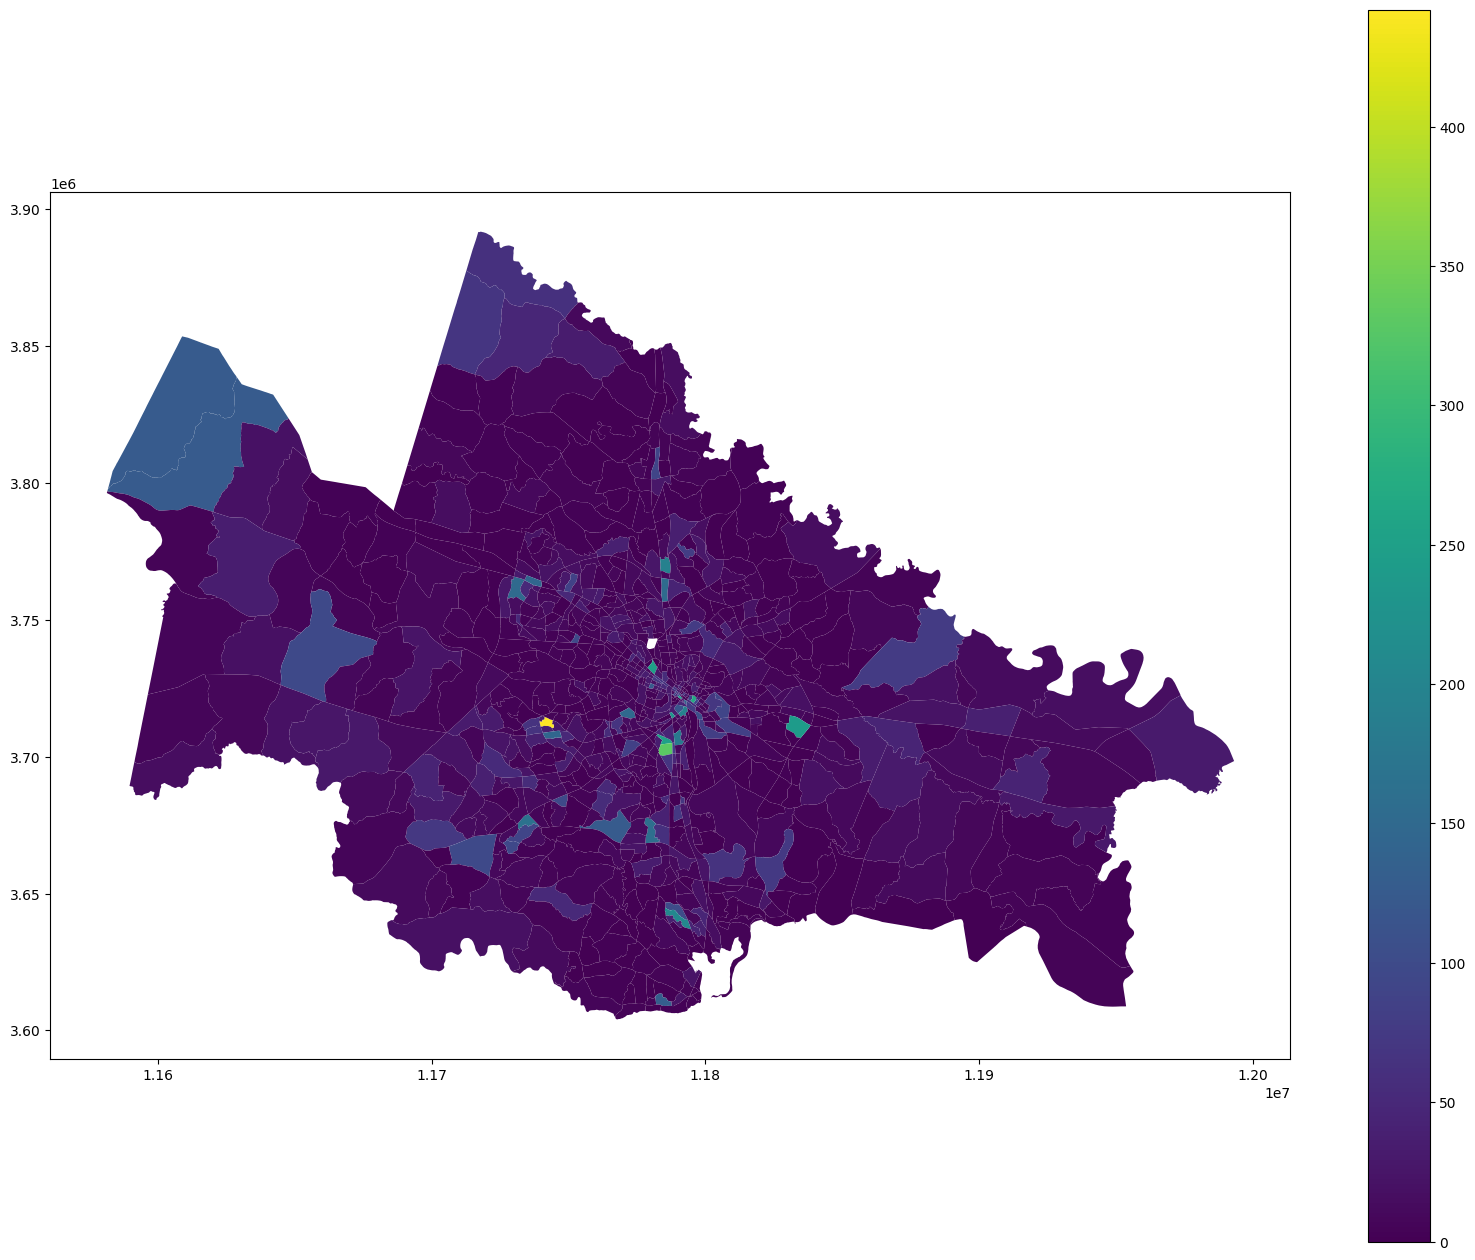

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# In[5]:


pd.set_option("display.max_rows", None)


# In[6]:

# Get Current Directory
import os
os.getcwd()

# In[7]:


os.chdir('C:\\Risk_WF\\Model_Files\\Training_Data')

current_taz_data_3 = gpd.read_file(r'ModelTaz.shp')

current_taz_data_2 = gpd.read_file(r'TAZ_By_LY_WF.shp')

current_taz_data = pd.read_excel(r'TAZ_By_LY_WF_NEW.xlsx')

## Naming Columns to match
current_taz_data.rename (columns = {'TAZ':'Model_TAZ'},inplace = True)


current_taz_data_3.rename (columns = {'TOPOP_17':'TOT_POP','HH_17':'HH'},inplace = True)

current_taz_data_new=pd.merge(current_taz_data,current_taz_data_3.iloc[:,[1,9,17]],on = 'Model_TAZ', how = 'inner')


# In[22]:
## Feature Creation : Population Density
current_taz_data_new['POP_Den'] = current_taz_data_new['TOT_POP']/current_taz_data_new['ACRES']

current_taz_data_new = current_taz_data_new.replace(np.nan, 0)
# Function to clean numeric strings and convert to float
def clean_numeric_string(value):
    if isinstance(value, str):  # Check if the value is a string
        return float(value.replace(',', ''))  # Remove commas and convert to float
    return value  # Return the original value if not a string

# Apply the function to clean and convert all values in the DataFrame
current_taz_data_new_2 = current_taz_data_new.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 26]]
current_taz_data_new_2 = current_taz_data_new_2.applymap(clean_numeric_string)
# Assuming you've already defined the round_and_convert function and selected x and y
# Recreate x and y with the cleaned data
x = current_taz_data_new_2.dropna()
y = current_taz_data_new.iloc[:, [-6]]

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

# Initialize and train the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=800, random_state=42)
regressor.fit(x_train, y_train.values.ravel())  # Fit the model


x_train.columns

# In[324]:


x_train = x_train.iloc[:,0:15]


# # In[325]:


# x_train.columns


# # In[211]:


# ### Need to make a better split that is a better representation of the whole data


# # In[326]:


# # For Test Data

# r_square=regressor.score(x_test, y_test)
# r2_n=len(y_test)
# r2_k=x_test.shape[1]
# adjusted_r_square = 1 - (1-r_square)*(r2_n-1)/(r2_n-r2_k-1)
# print(r_square)
# print(adjusted_r_square)


# # In[317]:


# x_test


# # In[331]:


# #x_test = x_test.iloc[:,0:15]


# # In[343]:


# x_test = x_test.iloc[:,0:15]
# output=x_test
# y_pred_test = regressor.predict(x_test)
# np.set_printoptions(precision=2)
# output['y_pred_test']=y_pred_test
# output['y_test']=y_test
# output.iloc[:,[-1,-2]].head(30)


# # In[274]:


# # For Test Data

# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(output.iloc[:,[-1]], output.iloc[:,[-2]])  ## (y_true, y_pred)
# rmse = np.sqrt(mse)
# print("RMSE (Test Data)= ",rmse)


# # In[275]:


# std = output.iloc[:,[-1]].std()
# print("StdDev_TestData = ",std)


# # In[276]:


# y_max = output.iloc[:,[-1]].max()
# print("y_max = ",y_max)


# # In[277]:


# y_min = output.iloc[:,[-1]].min()
# print("y_min = ",y_min)


# # In[278]:


# nrmse = rmse/(y_max - y_min)  # Normalized RMSE for comparison with other models
# print("Normalized RMSE (Test Data) = ", nrmse)  # Normalized RMSE for comparison with other models


# In[279]:


# # Obtain feature importances
# feature_importances = regressor.feature_importances_
# # Printing Variable Coefficients
# for feature, importance in zip(x_train.columns, feature_importances):
#     print(f"{feature}: {importance}")



x_test = x_test.iloc[:,0:15]



# os.chdir('C:\\Users\\rsingh\\OneDrive - PlanRVA\\Documents\\SP_ResiliencyModel\\Taz_2050 File\\Model50Taz')

x_test.columns

# In[130]:

os.chdir('C:\\Risk_WF\\Model_Files\\Paste_Input_File_Here\\Base TAZ SHP')
Base_TAZ = gpd.read_file(r'Base_TAZ.shp')
Base_TAZ.columns

os.chdir('C:\\Risk_WF\\Model_Files\\Paste_Input_File_Here')
input_data = pd.read_excel(r'Input_WF.xlsx')

input_data.head()

# input_data[1:]

os.chdir('C:\\Risk_WF\\Model_Files\\Paste_Input_File_Here')
input_data = pd.read_excel(r'Input_WF.xlsx')

input_data.head()

#input_data.columns=input_data.iloc[0,:]

input_data.head()

input_data=input_data.drop(index = 0)

input_data.head()

input_data = input_data.replace(np.nan, 0)

input_data['TAZ'] = input_data['TAZ'].astype(int)

Base_TAZ = Base_TAZ.replace(np.nan, 0)

Base_TAZ['TAZ'] = Base_TAZ['TAZ'].astype(int)

print(input_data.dtypes)

forecasted_taz_data = pd.merge(Base_TAZ, input_data, on = 'TAZ', how = 'inner')

forecasted_taz_data.columns ## Input data shapefile created

# forecasted_taz_data.shape

forecasted_taz_data['POP_Den'] = forecasted_taz_data['TOT_POP']/forecasted_taz_data['TAZ_ACRES_Ar']
x_test = forecasted_taz_data.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,-8,-1]]

x_test.columns

x_train.columns

x_test.columns = x_train.columns

y_pred = regressor.predict(x_test)

forecasted_taz_data['Future_Summ_Area'] = y_pred

forecasted_taz_data['Future_Acr_Aff'] = (forecasted_taz_data['Future_Summ_Area']*100)/forecasted_taz_data['TAZ_ACRES_Ar'] 


forecasted_taz_data['Future_ACR_Aff_Prop']=forecasted_taz_data['Future_Summ_Area']/forecasted_taz_data['TAZ_ACRES_Ar']

# In[69]:


for i in range(35):

    #col = forecasted_taz_data.iloc[:,8+i]
    if forecasted_taz_data.columns[i+8] == 'JUR':
        continue
    elif ((forecasted_taz_data.columns[i+8] == 'TOT_POP')|("EMP" in forecasted_taz_data.columns[i+8])|("HH" in forecasted_taz_data.columns[i+8])):
        forecasted_taz_data['Scn_'+forecasted_taz_data.columns[i+8]] = round(forecasted_taz_data.iloc[:,8+i].astype(float)*forecasted_taz_data['Future_ACR_Aff_Prop'],0)
    else:
        forecasted_taz_data['Scn_'+forecasted_taz_data.columns[i+8]] = forecasted_taz_data.iloc[:,8+i].astype(float)*forecasted_taz_data['Future_ACR_Aff_Prop']


forecasted_taz_data.columns

# In[73]:


Scn_Output = forecasted_taz_data.drop( columns = ['Scn_Parcel_ACR_Ar','Scn_TAZ_ACRES_Ar'])




# In[85]:
os.chdir('C:\\Risk_WF\\Model_Files\\Output_Files\\Output_Shp')


# In[86]:


Scn_Output.to_file(driver = 'ESRI Shapefile', filename =r'Scn_Output.shp', crs = "EPSG:4326" )


# In[87]:


Scn_Output.to_excel('Scn_Output.xlsx')

Scn_Output.columns

# Total Population Affected
Scn_Output['Scn_TOT_POP'].sum()

# Total Employment Affected
Scn_Output['Scn_TOT_EMP'].sum()

# Total Acreage Affected
Scn_Output['Future_Summ_Area'].sum()

# Total Households Affected
Scn_Output['Scn_HH'].sum()

fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Scn_TOT_POP", legend=True,ax=ax)

fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Scn_TOT_EMP", legend=True,ax=ax)

fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Future_Summ_Area", legend=True,ax=ax)

fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Scn_HH", legend=True,ax=ax)